In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!pip install vaderSentiment
!pip install deep-translator
!pip install langdetect
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
from langdetect import detect
import codecs
from deep_translator import GoogleTranslator
sia= SentimentIntensityAnalyzer()


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Datahack/dataset_datahack_videos.csv")
df

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,466,466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",PT59S,2351,185,0,2023-02-21T12:57:44Z,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ..."
467,467,467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",PT32M10S,38969,1245,182,2023-03-16T14:30:01Z,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...
468,468,468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",PT9M,34971,1451,80,2023-03-05T08:30:18Z,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...
469,469,469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT13M58S,584614,40702,1493,2023-03-27T06:30:41Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...


In [ ]:

text="I will kill myself "
text2="you are amazing"

print(sia.polarity_scores(text))

{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.6908}


In [ ]:
!pip3 install emoji==0.6.0
from transformers import pipeline
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

def sent(text):  
  if detect(text)!="en":
    translated=GoogleTranslator(source='auto', target='en').translate(text)
    a=sentiment_pipeline(translated)
  else:
    a=sentiment_pipeline(text)
 
  return a


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def str_to_list_of_lists(input_str):
    # Remove any leading/trailing whitespaces or brackets
    input_str = input_str.strip('[]').strip()

    # Split the input string by '],[' to separate the sublists
    sublists = input_str.split('],[')

    # Create a list of lists from the sublists
    list_of_lists = []
    for sublist in sublists:
        # Remove any remaining brackets and split by comma
        items = sublist.strip('[]').replace("'","").replace('"',"").split(',')

    return items
df['Comments'] = df['Comments'].apply(str_to_list_of_lists)

In [ ]:
df["Comments"]

0      [Favrt COLOUR BTAO and SUBSCRIBE krke Heart le...
1      [Congratulations Aswath Varun.. Way to go brot...
2      [So nice explaining,  cant express in words,  ...
3      [I recently delivered a baby boy. He is 10 day...
4      [Pet btao and Subscribe krke Heart lelo \r INS...
                             ...                        
466    [Hello Everyone,  My Name is Ishaan Arora.Im t...
467    [Get my new book ‘GET EPIC SHIT DONE’ here: ht...
468    [I showed this video to my spouse. She is happ...
469    [Mother-Daugher love is pure... both of you lo...
470    [Bhai ki Ghar me aaj paneer banegi ,  Sidepod ...
Name: Comments, Length: 471, dtype: object

In [ ]:
var = list(df["Comments"])
for i in range(len(var)):
  for j in range(len(var[i])):
    var[i][j] = str(var[i][j])

In [ ]:
var

[['Favrt COLOUR BTAO and SUBSCRIBE krke Heart le loDiscord : https://discord.gg/paglaa-tech-838701529891602485',
  ' Enjoying the new video. Loving it ',
  ' best video and funniest video ever ',
  ' Your videos are amazing ',
  ' Big fan bro !!!',
  ' I love you bro soo much ',
  ' BEST VIDEO BRUH DIED LAUGHING',
  ' Op...broFav Colour - Green.*MAINE subscribe Kar Diya.️',
  ' Big fan bhaiya ',
  ' You so cute ',
  ' Video mast he Paglaa bhai ️',
  ' Big fan bro',
  ' Thank you Bhai heart dene ke liye',
  ' Big fan sir love you bro',
  ' Niec video 🇮🇳',
  ' And bigger fan ️ bro',
  ' Big fan of you sirrrrrrrrr',
  ' Big fan Brother',
  ' Mene Subscribe kar dia he or mera favourite colour he purple  me apka bohot bara fan hu love you ',
  ' My favourite colour is black ️',
  ' Mera favourite colour gray️️',
  ' Big fan',
  ' Purple  and very BIG FAN ',
  ' Orange my favourite colour ',
  ' Mera favourite colour dark blue hai ',
  ' Paglaa vai live kab ao ge',
  ' Op video bhai',
  ' Or

In [ ]:
var[2]

['So nice explaining',
 ' cant express in words',
 ' Bb is like Shah Rukh Khan of YouTube India! He would go a long way ️',
 '  Success isnt always about greatness. Its about consistency Consistent hard work leads to success. Greatness will come.',
 ' You never disappoint me . .every time when I listen to your book summary...it brings a little change in my life (or improve my life)',
 ' Wonderfully explained!! You break lessons in a simple and engaging ways.',
 ' Great step bro',
 ' this series will be amazing for sure ',
 ' Following you from alot of time...Youre transforming my life...',
 ' This is what sucess looks like',
 ' He is very talented ️️',
 ' Make a videos on any IT guy how has changed his life ..!! Please ',
 ' Sir aapki bhi success koi Kam nhi hai .Proud of you sir ',
 ' Plus Minus was a Masterpiece. ',
 ' Like for BB ',
 ' thnx for this great content .....',
 ' most talented youtuber Bhuvan bam',
 ' Assalamualaikum Zeeshan .. u will be the next in shaa allah...thanks fr

In [ ]:
for i in range(len(var)):
  for j in range(len(var[i])):
    if len(var[i][j].strip()) <= 15:
      var[i][j] = "placeholder"

In [ ]:
var[2]

['So nice explaining',
 ' cant express in words',
 ' Bb is like Shah Rukh Khan of YouTube India! He would go a long way ️',
 '  Success isnt always about greatness. Its about consistency Consistent hard work leads to success. Greatness will come.',
 ' You never disappoint me . .every time when I listen to your book summary...it brings a little change in my life (or improve my life)',
 ' Wonderfully explained!! You break lessons in a simple and engaging ways.',
 'placeholder',
 ' this series will be amazing for sure ',
 ' Following you from alot of time...Youre transforming my life...',
 ' This is what sucess looks like',
 ' He is very talented ️️',
 ' Make a videos on any IT guy how has changed his life ..!! Please ',
 ' Sir aapki bhi success koi Kam nhi hai .Proud of you sir ',
 ' Plus Minus was a Masterpiece. ',
 'placeholder',
 ' thnx for this great content .....',
 ' most talented youtuber Bhuvan bam',
 ' Assalamualaikum Zeeshan .. u will be the next in shaa allah...thanks fr all y

In [ ]:
lstp=[]
lstn=[]
lstneu=[]
j = df["Comments"][0]
pos=0
neg=0
neu=0
for i in j:
  if len(i.strip()) != 22:
    print(len(i.strip()))
    x=sent(i[:128])
    print(x)
  if(x[0]["label"]=='NEU'):
    neu=neu+x[0]["score"]
  if(x[0]["label"]=='POS'):
    pos=pos+x[0]["score"]
  else:
    neg=neg+x[0]["score"]
lstp.append(pos/100)
lstn.append(neg/100)
lstneu.append(neu/100)

107
[{'label': 'NEU', 'score': 0.8828957676887512}]
33
[{'label': 'POS', 'score': 0.9925652742385864}]
34
[{'label': 'POS', 'score': 0.9905181527137756}]
23
[{'label': 'POS', 'score': 0.990740180015564}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
23
[{'label': 'POS', 'score': 0.9919695258140564}]
29
[{'label': 'POS', 'score': 0.9875435829162598}]
54
[{'label': 'NEU', 'score': 0.9283158183097839}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
27
[{'label': 'NEU', 'score': 0.9710776805877686}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
33
[{'label': 'POS', 'score': 0.974304735660553}]
24
[{'label': 'POS', 'score': 0.9902991056442261}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
20
[{'label': 'POS', 'score': 0.9300746321678162}]
26
[{'label': 'POS', 'score': 0.9893316030502319}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
96
[{'label': 'POS', 'score': 0.9757567644119263}]
30
[{'label': 'POS', 'score': 0.

In [ ]:
lstp

[0.29457892298698424]

In [ ]:
lstn

[0.47261316001415254]

In [ ]:
lstneu

[0.45398479521274565]

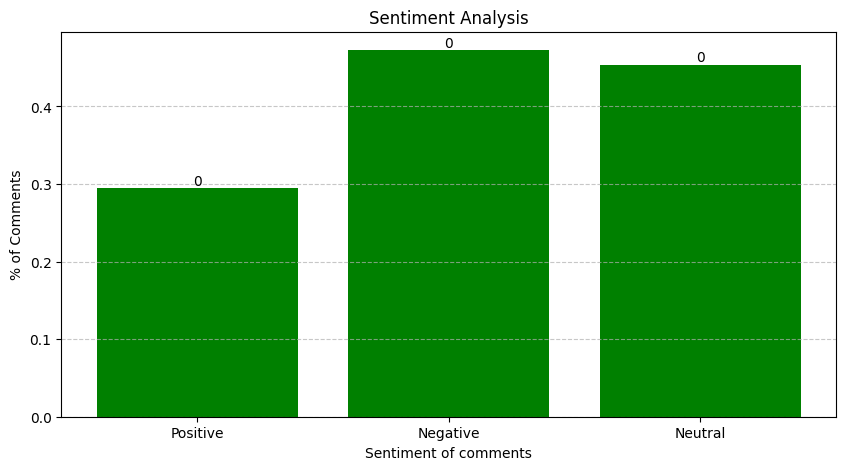

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(["Positive", "Negative", "Neutral"], [lstp[0], lstn[0], lstneu[0]], color = 'green')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment of comments")
plt.ylabel("% of Comments")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
plt.show()